In [1]:
#Separate notebook to work on Topic Modelling with LDA
%pylab inline
from sys import platform
from pprint import pprint
import pandas as pd
from tqdm import trange

if platform == "win32":
    path = 'C:/Users/olive/'
elif platform == "darwin":
    path = '~/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
c_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/comments.csv')
s_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/submissions.csv')

s_df = s_df.sort_values(by='datetime')
c_df = c_df.sort_values(by='datetime')

In [87]:
comments = c_df.sample(25000)

comments = comments.reset_index().drop(columns=['id', 'datetime', 'sentiment', 'compound_score', 'submission_id', 'parent_id'], axis=1)

comments.head()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,processed_text
0,Whilst I agree that their final tax bill requi...,whilst i agree that their final tax bill requi...
1,We had hospital appointments for my son I had ...,we had hospital appointments for my son i had ...
2,Looks like a modified version of a previous pi...,looks like a modified version of a previous pi...
3,Mine too :),mine too :)
4,If it’s a proper respirator then you have zero...,if it’s a proper respirator then you have zero...


In [88]:
# REMOVE EMAILS AND NEWLINE CHARACTERS

data = comments['processed_text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \s
<ipython-input-88-9434b3e1a8c7>:6: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-88-9434b3e1a8c7>:9: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['whilst i agree that their final tax bill requires some serious scrutiny do '
 'you realise that its not all black on white when it comes to giving and '
 'receiving \\n\\nthink about direct and indirect job creation ni '
 'contributions providing an ecosystem that hundreds of thousands of small '
 'businesses from uk can tap into you need to realise that big chunk of az '
 'marketplace (not talking about aws etc) is powered by small / medium sized '
 'businesses']


/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


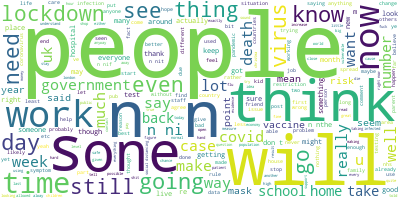

In [89]:
# EXPLORATORY ANALYSIS

from wordcloud import WordCloud

long_string = ','.join(list(comments['processed_text'].values))

wordcloud = WordCloud(background_color="white",
                      max_words=5000,
                      contour_width=3,
                      contour_color='steelblue'
                     )

wordcloud.generate(long_string)

wordcloud.to_image()

In [90]:
# Tokenize words and more text clean-up

import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),
                                            deacc=True))
        
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['whilst', 'agree', 'that', 'their', 'final', 'tax', 'bill', 'requires', 'some', 'serious', 'scrutiny', 'do', 'you', 'realise', 'that', 'its', 'not', 'all', 'black', 'on', 'white', 'when', 'it', 'comes', 'to', 'giving', 'and', 'receiving', 'nthink', 'about']


In [91]:
#Bigram and Trigram Phrase Modelling

bigram = gensim.models.Phrases(data_words, 
                               min_count=5, 
                               threshold=100
                              )
trigram = gensim.models.Phrases(bigram[data_words], 
                                threshold=100
                               )

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['whilst', 'agree', 'that', 'their', 'final', 'tax', 'bill', 'requires', 'some', 'serious', 'scrutiny', 'do', 'you', 'realise', 'that', 'its', 'not', 'all', 'black', 'on', 'white', 'when', 'it', 'comes', 'to', 'giving', 'and', 'receiving', 'nthink', 'about', 'direct', 'and', 'indirect', 'job', 'creation', 'ni', 'contributions', 'providing', 'an', 'ecosystem', 'that', 'hundreds', 'of', 'thousands', 'of', 'small', 'businesses', 'from', 'uk', 'can', 'tap', 'into', 'you', 'need', 'to', 'realise', 'that', 'big', 'chunk', 'of', 'az', 'marketplace', 'not', 'talking', 'about', 'aws', 'etc', 'is', 'powered', 'by', 'small', 'medium', 'sized', 'businesses']


In [92]:
#Remove Stopwords, Make Bigrams and Lemmantize

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from',
                   'subject', 
                   're', 
                   'edu', 
                   'use'])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
#Define functions for stopwords, bigrams, trigrams and lemmatization

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
import spacy

data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load("en_core_web_sm", disable=['parser',
                                            'ner'])

data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:1])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['whilst', 'agree', 'final', 'tax', 'bill', 'require', 'serious', 'scrutiny', 'realise', 'black', 'white', 'come', 'give', 'receive', 'nthink', 'direct', 'indirect', 'job', 'creation', 'ni', 'contribution', 'provide', 'ecosystem', 'hundred', 'thousand', 'small', 'business', 'uk', 'tap', 'realise', 'big', 'chunk', 'marketplace', 'talk', 'aw', 'power', 'small', 'medium', 'sized', 'business']]


In [95]:
#Data Tranformation: Corpus and Dictionary

import gensim.corpora as corpora

id2word = corpora.Dictionary(data_lemmatized)
# id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
# texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)]]


In [99]:
# Building LDA model

def build_lda(num_topics):
    return gensim.models.LdaModel(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=num_topics,
                                  random_state=100,
                                  update_every=1,
                                  chunksize=10000,
                                  iterations=200,
                                  passes=40,
                                  alpha='auto',
                                  per_word_topics=True)

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 20/20 [1:19:51<00:00, 239.56s/it]


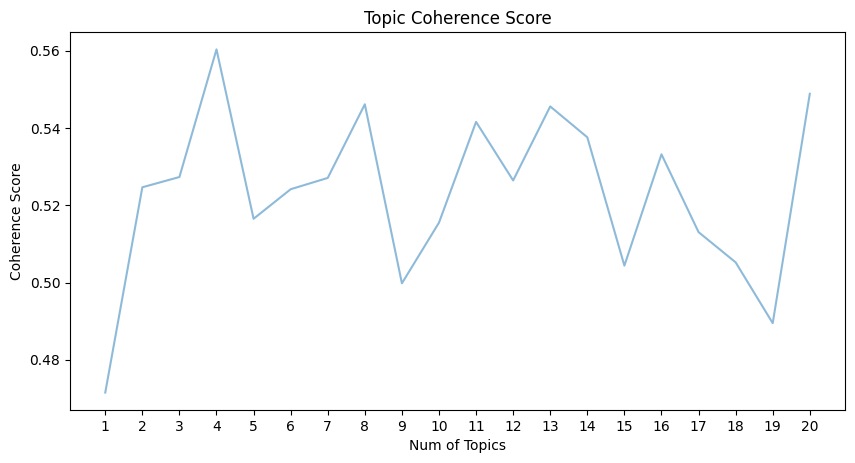

In [97]:
# METHOD FOR TESTING COHERENCE SCORE FOR DIFFERING NUMBERS OF TOPICS

from gensim.models import CoherenceModel

topic_coherence = []
num_topics = 20

for n in trange(1, num_topics + 1):
    
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=n,
                                       random_state=100
                                       passes=40,
                                       iterations=200,
                                       chunksize=10000,
                                       alpha='auto',
                                       per_word_topics=True
                                       eval_every=None
                                      )

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=data_lemmatized, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    
    topic_coherence.append(coherence_model_lda.get_coherence())


x = [i for i in range(1, num_topics + 1)]

fig, ax1 = plt.subplots(1, dpi=100)
fig.set_size_inches(10, 5)

ax1.set_title('Topic Coherence Score')
ax1.set_xlabel('Num of Topics')
ax1.set_ylabel('Coherence Score')
ax1.set_xticks(x)
ax1.plot(x, topic_coherence, alpha=0.5)

In [45]:
three_topics_lda = build_lda(3)
three_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"work" + 0.031*"school" + 0.020*"home" + 0.016*"tier" + 0.013*"mask" + 0.011*"open" + 0.011*"kid" + 0.011*"close" + 0.010*"child" + 0.010*"go"'),
 (1,
  '0.026*"people" + 0.019*"get" + 0.017*"do" + 0.014*"go" + 0.012*"think" + 0.011*"say" + 0.010*"make" + 0.009*"know" + 0.009*"see" + 0.008*"s"'),
 (2,
  '0.024*"covid" + 0.022*"vaccine" + 0.018*"case" + 0.015*"test" + 0.014*"day" + 0.013*"number" + 0.013*"dose" + 0.012*"death" + 0.010*"https" + 0.010*"hospital"')]

In [100]:
four_topics_lda = build_lda(4)
four_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"lockdown" + 0.012*"country" + 0.009*"tier" + 0.009*"restriction" + 0.007*"london" + 0.006*"bad" + 0.006*"go" + 0.006*"week" + 0.005*"area" + 0.005*"measure"'),
 (1,
  '0.023*"people" + 0.017*"go" + 0.016*"get" + 0.011*"do" + 0.010*"work" + 0.008*"think" + 0.007*"time" + 0.006*"say" + 0.006*"need" + 0.006*"m"'),
 (2,
  '0.016*"death" + 0.014*"case" + 0.013*"test" + 0.012*"covid" + 0.012*"number" + 0.011*"day" + 0.008*"vaccine" + 0.008*"week" + 0.008*"people" + 0.006*"infection"'),
 (3,
  '0.015*"do" + 0.012*"people" + 0.011*"say" + 0.009*"make" + 0.009*"think" + 0.008*"government" + 0.008*"thank" + 0.007*"s" + 0.006*"m" + 0.006*"comment"')]

In [ ]:
five_topics_lda = build_lda(5)
five_topics_lda.print_topics()

In [39]:
six_topics_lda = build_lda(6)
six_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.038*"want" + 0.028*"mask" + 0.025*"open" + 0.025*"kid" + 0.022*"family" + 0.019*"change" + 0.018*"able" + 0.018*"friend" + 0.017*"wear" + 0.017*"issue"'),
 (1,
  '0.028*"say" + 0.028*"day" + 0.024*"make" + 0.022*"see" + 0.020*"week" + 0.019*"m" + 0.019*"year" + 0.017*"really" + 0.017*"thing" + 0.016*"good"'),
 (2,
  '0.043*"covid" + 0.024*"number" + 0.022*"death" + 0.017*"hospital" + 0.014*"high" + 0.014*"close" + 0.011*"care" + 0.011*"likely" + 0.010*"health" + 0.010*"comment"'),
 (3,
  '0.057*"school" + 0.039*"test" + 0.037*"be" + 0.032*"re" + 0.031*"first" + 0.022*"hope" + 0.019*"child" + 0.015*"reason" + 0.015*"pandemic" + 0.014*"problem"'),
 (4,
  '0.045*"get" + 0.040*"go" + 0.040*"do" + 0.027*"think" + 0.023*"work" + 0.022*"time" + 0.021*"know" + 0.019*"s" + 0.019*"well" + 0.017*"need"'),
 (5,
  '0.079*"people" + 0.028*"vaccine" + 0.023*"case" + 0.021*"lockdown" + 0.020*"government" + 0.016*"dose" + 0.015*"bad" + 0.015*"many" + 0.014*"new" + 0.013*"point"')]

In [102]:
eight_topics_lda = build_lda(8)
eight_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.035*"lockdown" + 0.021*"go" + 0.015*"pub" + 0.012*"restriction" + 0.011*"tier" + 0.010*"week" + 0.009*"london" + 0.008*"open" + 0.008*"place" + 0.007*"rule"'),
 (1,
  '0.027*"people" + 0.019*"go" + 0.019*"get" + 0.014*"work" + 0.011*"do" + 0.009*"home" + 0.009*"say" + 0.008*"need" + 0.008*"take" + 0.008*"see"'),
 (2,
  '0.026*"case" + 0.024*"day" + 0.023*"test" + 0.022*"death" + 0.021*"number" + 0.017*"week" + 0.011*"positive" + 0.010*"datum" + 0.010*"https" + 0.010*"covid"'),
 (3,
  '0.027*"thank" + 0.024*"do" + 0.013*"good" + 0.013*"m" + 0.010*"post" + 0.010*"know" + 0.010*"s" + 0.009*"say" + 0.009*"get" + 0.009*"really"'),
 (4,
  '0.054*"vaccine" + 0.013*"symptom" + 0.012*"trial" + 0.011*"get" + 0.011*"dose" + 0.008*"vaccination" + 0.007*"flu" + 0.007*"approve" + 0.005*"mild" + 0.005*"feel"'),
 (5,
  '0.023*"people" + 0.012*"do" + 0.011*"virus" + 0.009*"think" + 0.008*"covid" + 0.008*"say" + 0.007*"government" + 0.007*"lockdown" + 0.007*"die" + 0.007*"get"'),
 (6,
  '0.031

In [104]:
eleven_topics_lda = build_lda(11)
eleven_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.028*"lockdown" + 0.024*"pub" + 0.017*"tier" + 0.016*"rule" + 0.015*"area" + 0.015*"go" + 0.011*"police" + 0.011*"london" + 0.010*"restriction" + 0.009*"live"'),
 (1,
  '0.029*"people" + 0.024*"go" + 0.021*"get" + 0.016*"work" + 0.013*"do" + 0.010*"think" + 0.009*"need" + 0.009*"take" + 0.009*"home" + 0.009*"time"'),
 (2,
  '0.024*"https" + 0.018*"thank" + 0.016*"coronavirus" + 0.016*"news" + 0.012*"link" + 0.012*"datum" + 0.011*"article" + 0.009*"post" + 0.008*"nhttps" + 0.007*"report"'),
 (3,
  '0.041*"pay" + 0.027*"money" + 0.023*"government" + 0.013*"do" + 0.012*"tory" + 0.010*"vote" + 0.009*"fuck" + 0.008*"nhs" + 0.008*"brexit" + 0.008*"tax"'),
 (4,
  '0.035*"symptom" + 0.021*"app" + 0.019*"feel" + 0.015*"cough" + 0.015*"question" + 0.015*"cold" + 0.009*"flu" + 0.009*"mild" + 0.009*"fever" + 0.009*"asthma"'),
 (5,
  '0.025*"people" + 0.014*"virus" + 0.012*"do" + 0.009*"covid" + 0.009*"lockdown" + 0.008*"think" + 0.008*"say" + 0.007*"vaccine" + 0.007*"spread" + 0.007*"die"

In [106]:
thirteen_topics_lda = build_lda(13)
thirteen_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.049*"lockdown" + 0.019*"pub" + 0.017*"restriction" + 0.017*"london" + 0.017*"tier" + 0.015*"area" + 0.012*"go" + 0.011*"place" + 0.009*"rule" + 0.009*"country"'),
 (1,
  '0.034*"people" + 0.028*"go" + 0.021*"get" + 0.010*"do" + 0.010*"see" + 0.010*"think" + 0.010*"time" + 0.009*"take" + 0.009*"need" + 0.008*"work"'),
 (2,
  '0.024*"https" + 0.017*"coronavirus" + 0.014*"datum" + 0.013*"link" + 0.013*"news" + 0.012*"article" + 0.011*"covid" + 0.010*"government" + 0.009*"source" + 0.009*"uk"'),
 (3,
  '0.044*"do" + 0.022*"say" + 0.019*"s" + 0.019*"think" + 0.018*"m" + 0.017*"know" + 0.016*"good" + 0.016*"make" + 0.015*"re" + 0.014*"people"'),
 (4,
  '0.031*"question" + 0.021*"app" + 0.015*"answer" + 0.011*"lie" + 0.010*"ask" + 0.007*"blame" + 0.007*"track" + 0.006*"phone" + 0.006*"nonsense" + 0.005*"white"'),
 (5,
  '0.025*"people" + 0.016*"virus" + 0.012*"covid" + 0.010*"do" + 0.009*"die" + 0.008*"lockdown" + 0.008*"risk" + 0.008*"spread" + 0.007*"think" + 0.006*"say"'),
 (6,
 

In [108]:
twenty_topics_lda = build_lda(20)
twenty_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.087*"lockdown" + 0.027*"restriction" + 0.017*"go" + 0.015*"london" + 0.015*"people" + 0.014*"tier" + 0.014*"area" + 0.013*"place" + 0.009*"country" + 0.009*"first"'),
 (1,
  '0.056*"people" + 0.022*"get" + 0.017*"risk" + 0.016*"take" + 0.015*"go" + 0.013*"need" + 0.012*"do" + 0.010*"think" + 0.008*"care" + 0.008*"know"'),
 (2,
  '0.015*"quarantine" + 0.014*"link" + 0.013*"list" + 0.012*"time" + 0.012*"message" + 0.009*"government" + 0.009*"date" + 0.009*"also" + 0.008*"day" + 0.008*"flight"'),
 (3,
  '0.056*"do" + 0.038*"m" + 0.027*"know" + 0.026*"s" + 0.025*"think" + 0.024*"re" + 0.021*"good" + 0.019*"really" + 0.019*"sure" + 0.018*"thank"'),
 (4,
  '0.129*"vaccine" + 0.021*"question" + 0.020*"trial" + 0.018*"vaccinate" + 0.018*"dose" + 0.017*"vaccination" + 0.013*"group" + 0.012*"answer" + 0.011*"get" + 0.010*"roll"'),
 (5,
  '0.021*"virus" + 0.017*"people" + 0.011*"spread" + 0.010*"do" + 0.008*"covid" + 0.007*"much" + 0.006*"also" + 0.006*"think" + 0.006*"make" + 0.006*"me

In [111]:
# Visualize LDA

import pyLDAvis.gensim_models
import os
import pickle
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(eleven_topics_lda,
                                     corpus,
                                     id2word)
vis

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.129154 -0.140358       1        1  32.538498
5     -0.005596 -0.143417       2        1  24.901519
9      0.086080 -0.201614       3        1   9.849104
8     -0.145077 -0.017183       4        1   5.626104
2      0.220459  0.061099       5        1   5.022830
6     -0.122150 -0.024475       6        1   4.446055
7     -0.111964  0.063441       7        1   4.237160
10     0.273680 -0.044421       8        1   4.194899
0     -0.034515 -0.012318       9        1   4.173862
3     -0.068562  0.176469      10        1   3.222431
4      0.036801  0.282777      11        1   1.787538, topic_info=          Term         Freq        Total Category  logprob  loglift
387       test  1987.000000  1987.000000  Default  30.0000  30.0000
162          m  2623.000000  2623.000000  Default  29.0000  29.0000
566     school  1392.000000  1392.000000  Default  28.0000  28.0000
134       case  2367.000000  2367.000000  Default  27.0000  27.0000
67    lockdown  2500.000000  2500.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
633        bad    47.926802  1434.078279  Topic11  -5.3515   0.6257
618        use    38.210083   931.731221  Topic11  -5.5780   0.8304
865        old    35.655172   679.880444  Topic11  -5.6473   1.0763
1552     worry    33.118091   409.714335  Topic11  -5.7211   1.5090
1607     group    32.645700   535.680266  Topic11  -5.7354   1.2265

[807 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3846      2  0.987429   accident
8291      3  0.969605   accuracy
2068      5  0.250269   accurate
2068      8  0.732268   accurate
2068      9  0.009269   accurate
...     ...       ...        ...
246       3  0.760695  yesterday
246       5  0.023227  yesterday
246       8  0.029034  yesterday
3669      8  0.978913        zoe
1755      6  0.966425       zoom

[1870 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 10, 9, 3, 7, 8, 11, 1, 4, 5])

In [49]:
pyLDAvis.save_html(vis, '3_topic_lda_model.html')

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
